In [ ]:
#importing required libraries

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [535]:
data = pd.read_csv('all_city_cars.csv')

In [537]:
data.shape

(8369, 53)

In [541]:
data.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Tyre Type,Alloy Wheel Size,No Door Numbers,City,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN


In [539]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [285]:
data.describe()

,it,ownerNo,modelYear,centralVariantId,Year of Manufacture,comfort_count,Safety_count,Entertainment_count,top_features_count,Displacement,No of Cylinder,Values per Cylinder,Seating Capacity,Alloy Wheel Size,No Door Numbers,priceSaving,priceFixedText
count,8369.0,8369.000000,8369.000000,8369.000000,8349.000000,8369.000000,8369.000000,8369.000000,8369.000000,8365.000000,8338.000000,8318.000000,3.000000,2.000000,3.000000,0.0,0.0
mean,0.0,1.360139,2016.503286,4962.537340,2016.547850,15.609511,22.838451,6.684909,8.785160,1424.735923,3.802471,3.934359,6.333333,15.500000,3.333333,NaN,NaN
std,0.0,0.641958,3.921465,2747.040479,3.811882,6.529495,7.287703,3.470996,0.911979,477.629144,0.594613,0.792698,1.527525,0.707107,0.577350,NaN,NaN
min,0.0,0.000000,1985.000000,5.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,5.000000,15.000000,3.000000,NaN,NaN
25%,0.0,1.000000,2014.000000,2042.000000,2014.000000,11.000000,19.000000,5.000000,9.000000,1197.000000,4.000000,4.000000,5.500000,15.250000,3.000000,NaN,NaN
50%,0.0,1.000000,2017.000000,5320.000000,2017.000000,15.000000,23.000000,7.000000,9.000000,1248.000000,4.000000,4.000000,6.000000,15.500000,3.000000,NaN,NaN
75%,0.0,2.000000,2019.000000,7121.000000,2019.000000,20.000000,28.000000,9.000000,9.000000,1498.000000,4.000000,4.000000,7.000000,15.750000,3.500000,NaN,NaN
max,0.0,5.000000,2023.000000,11098.000000,2023.000000,37.000000,48.000000,21.000000,9.000000,5000.000000,23.000000,69.000000,8.000000,16.000000,4.000000,NaN,NaN


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   it                    8369 non-null   int64  
 1   ft                    8369 non-null   object 
 2   bt                    8365 non-null   object 
 3   km                    8369 non-null   object 
 4   transmission          8369 non-null   object 
 5   ownerNo               8369 non-null   int64  
 6   owner                 8369 non-null   object 
 7   oem                   8369 non-null   object 
 8   model                 8369 non-null   object 
 9   modelYear             8369 non-null   int64  
 10  centralVariantId      8369 non-null   int64  
 11  variantName           8369 non-null   object 
 12  price                 8369 non-null   object 
 13  Registration Year     8317 non-null   object 
 14  Insurance Validity    8365 non-null   object 
 15  Fuel Type            

In [543]:
# these columns have no potential contribution to price
data.drop(['priceSaving', 'priceFixedText', 'Seating Capacity', 'Steering Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers'], axis=1, inplace=True)

In [555]:
# redundant and irrelevant columns are dropped
data.drop(['priceActual', 'trendingText.imgUrl', 'trendingText.heading', 'trendingText.desc', 'Registration Year', 'Year of Manufacture'], axis=1, inplace=True)

In [545]:
data[data['No of Cylinder'] == 23.0]

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,City,priceActual,trendingText.imgUrl,trendingText.heading,trendingText.desc
839,0,Electric,Hatchback,"20,000",Automatic,2,2nd Owner,Mahindra,Mahindra e2o Plus,2017,...,3 Phase AC Induction Motors,NaN,NaN,No,No,Bangalore,NaN,NaN,NaN,NaN


In [547]:
data['No of Cylinder'] = data['No of Cylinder'].replace(23.0, 2)

In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8309 entries, 0 to 8368
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   it                  8309 non-null   int64  
 1   bt                  8305 non-null   object 
 2   km                  8309 non-null   object 
 3   transmission        8309 non-null   object 
 4   ownerNo             8309 non-null   int64  
 5   oem                 8309 non-null   object 
 6   model               8309 non-null   object 
 7   modelYear           8309 non-null   int64  
 8   price               8309 non-null   object 
 9   Insurance Validity  8305 non-null   object 
 10  Fuel Type           8309 non-null   object 
 11  Seats               8307 non-null   object 
 12  Safety_count        8309 non-null   int64  
 13  top_features_count  8309 non-null   int64  
 14  Color               8309 non-null   object 
 15  Max Power           8309 non-null   object 
 16  Max Torque 

In [ ]:
data.drop(['Values per Cylinder', 'Value Configuration', 'Compression Ratio', 'Fuel Suppy System', 'BoreX Stroke', 'Engine Type', 'Displacement', 'comfort_count', 'Entertainment_count', 'Engine Displacement', 'Ownership', 'RTO', 'Kms Driven', 'centralVariantId', 'variantName', 'owner', 'Transmission','ft'], axis=1, inplace=True)

In [489]:
data.drop('it',axis=1,inplace=True)

In [ ]:
#checcking for null values

In [561]:
data.isnull().sum()

it                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
price                    0
Insurance Validity       4
Fuel Type                0
Seats                    2
Safety_count             0
top_features_count       0
Color                    0
Max Power                0
Max Torque               0
No of Cylinder          27
Turbo Charger          980
Super Charger         1902
City                     0
dtype: int64

In [563]:
# drop null values in Max Power column
data.dropna(subset=['Max Power'], inplace=True)

In [565]:
# drop null values
data.dropna(subset=['No of Cylinder', 'bt', 'Seats'], inplace=True)

In [567]:
# change all strings in this column to lowercase
data['Turbo Charger'] = data['Turbo Charger'].str.lower()
data['Turbo Charger'].value_counts()

Turbo Charger
no       4257
yes      3014
twin       53
turbo       2
Name: count, dtype: int64

In [569]:
data['Super Charger'] = data['Super Charger'].str.lower()
data['Super Charger'].value_counts()

Super Charger
no     6386
yes      17
Name: count, dtype: int64

In [571]:
# impute all the null values in this column to 'no'
data['Turbo Charger'] = data['Turbo Charger'].fillna('no')

# same as well as in super charger
data['Super Charger'] = data['Super Charger'].fillna('no')

In [573]:
data['Insurance Validity'] = data['Insurance Validity'].str.lower()
data['Insurance Validity'].value_counts()

Insurance Validity
third party insurance    3994
comprehensive            3131
third party               626
zero dep                  302
not available             215
1                           3
2                           1
Name: count, dtype: int64

In [575]:
# change insurance validity 1 to 1st party
data['Insurance Validity'] = data['Insurance Validity'].replace('1', '1st party')
# and for 2, 2nd party
data['Insurance Validity'] = data['Insurance Validity'].replace('2', '2nd party')

In [577]:
# convert price from string to numeric
data['price'] = data['price'].str.extract(r'(\d+\.?\d*)').astype(float)
data.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,Max Power,Max Torque,No of Cylinder,Turbo Charger,Super Charger,City
0,0,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,5 Seats,13,8,White,67.04bhp@6000rpm,90Nm@3500rpm,3.0,no,no,Bangalore
1,0,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,5 Seats,27,9,White,121.31bhp@6500rpm,150Nm@4500rpm,3.0,no,no,Bangalore
2,0,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,5 Seats,24,9,Red,84bhp@6000rpm,114Nm@3500rpm,3.0,no,no,Bangalore
3,0,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,5 Seats,18,9,Others,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,no,no,Bangalore
4,0,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,5 Seats,22,9,Gray,88.5bhp@4000rpm,200Nm@1750rpm,4.0,yes,no,Bangalore


In [579]:
# change column name of price
data.rename(columns={'price': 'price_in_lakhs'}, inplace=True)

In [581]:
# converting seats from string to numeric
data['Seats'] = data['Seats'].str.extract(r'(\d+)').astype(int)
data.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price_in_lakhs,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,Max Power,Max Torque,No of Cylinder,Turbo Charger,Super Charger,City
0,0,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,5,13,8,White,67.04bhp@6000rpm,90Nm@3500rpm,3.0,no,no,Bangalore
1,0,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,5,27,9,White,121.31bhp@6500rpm,150Nm@4500rpm,3.0,no,no,Bangalore
2,0,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,5,24,9,Red,84bhp@6000rpm,114Nm@3500rpm,3.0,no,no,Bangalore
3,0,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,5,18,9,Others,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,no,no,Bangalore
4,0,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,5,22,9,Gray,88.5bhp@4000rpm,200Nm@1750rpm,4.0,yes,no,Bangalore


In [583]:
# Extract power and torque
data['Power'] = data['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)
# df_cars['Power'] = df_cars['Max Power'].str.extract(r'(\d+\.?\d*)\s*(?:bhp|PS)?\s*(?:@|at)?\s*(?:\d+)*\s*(?:rpm|\(PS@rpm\))?')
data['Torque'] = data['Max Torque'].str.extract(r'(\d+\.?\d*)').astype(float)
data.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price_in_lakhs,Insurance Validity,...,top_features_count,Color,Max Power,Max Torque,No of Cylinder,Turbo Charger,Super Charger,City,Power,Torque
0,0,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,8,White,67.04bhp@6000rpm,90Nm@3500rpm,3.0,no,no,Bangalore,67.04,90.00
1,0,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,9,White,121.31bhp@6500rpm,150Nm@4500rpm,3.0,no,no,Bangalore,121.31,150.00
2,0,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,9,Red,84bhp@6000rpm,114Nm@3500rpm,3.0,no,no,Bangalore,84.00,114.00
3,0,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,9,Others,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,no,no,Bangalore,81.86,113.75
4,0,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,9,Gray,88.5bhp@4000rpm,200Nm@1750rpm,4.0,yes,no,Bangalore,88.50,200.00


In [585]:
data.drop(['Max Power', 'Max Torque'], axis=1, inplace=True)

In [587]:
# turn the km column dtype to int
data['km'] = data['km'].str.replace(',', '').astype(int)
data.head()


,it,bt,km,transmission,ownerNo,oem,model,modelYear,price_in_lakhs,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,No of Cylinder,Turbo Charger,Super Charger,City,Power,Torque
0,0,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,5,13,8,White,3.0,no,no,Bangalore,67.04,90.00
1,0,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,5,27,9,White,3.0,no,no,Bangalore,121.31,150.00
2,0,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,5,24,9,Red,3.0,no,no,Bangalore,84.00,114.00
3,0,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,5,18,9,Others,4.0,no,no,Bangalore,81.86,113.75
4,0,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,5,22,9,Gray,4.0,yes,no,Bangalore,88.50,200.00


In [367]:
data['km'].dtype

dtype('int32')

In [607]:
data.to_csv('cleaned_data.csv')

## Exploratory data analysis

In [595]:
data.columns

Index(['it', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'price_in_lakhs', 'Insurance Validity', 'Fuel Type',
       'Seats', 'Safety_count', 'top_features_count', 'Color',
       'No of Cylinder', 'Turbo Charger', 'Super Charger', 'City', 'Power',
       'Torque'],
      dtype='object')

<Axes: title={'center': 'Count of Fuel Type'}, xlabel='Fuel Type', ylabel='count'>

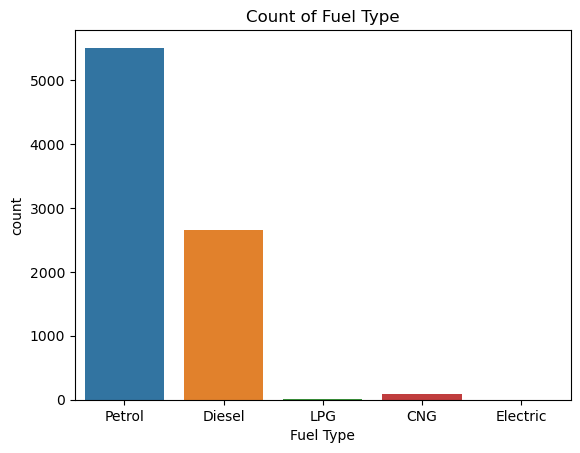

In [597]:
# visual the count of fuel type
plt.title("Count of Fuel Type")
sns.countplot(x=data["Fuel Type"],data=data,hue="Fuel Type")

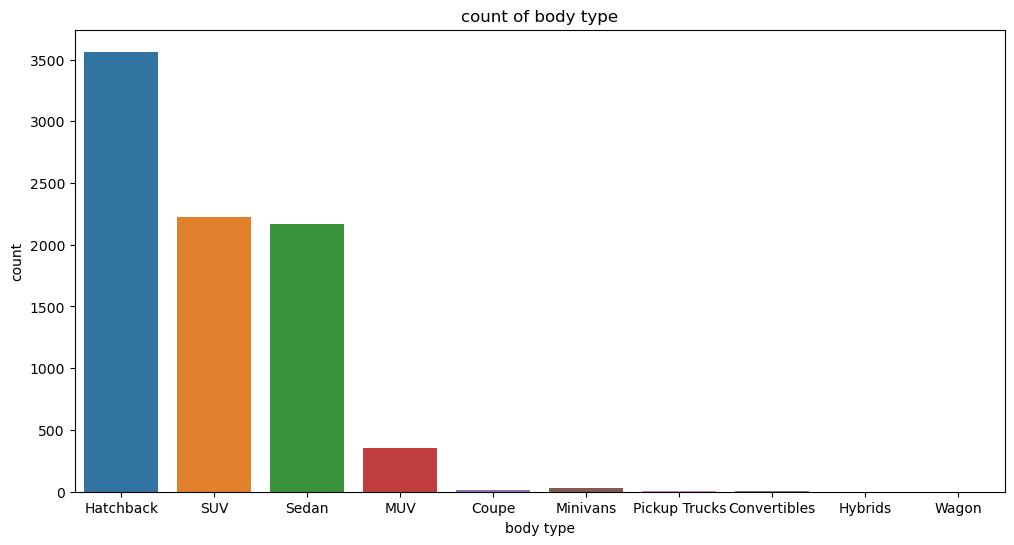

In [177]:
# visual the count of body type
plt.figure(figsize=(12,6))
plt.title("count of body type")
sns.countplot(x=df["body type"],data=df,hue="body type")
plt.show()

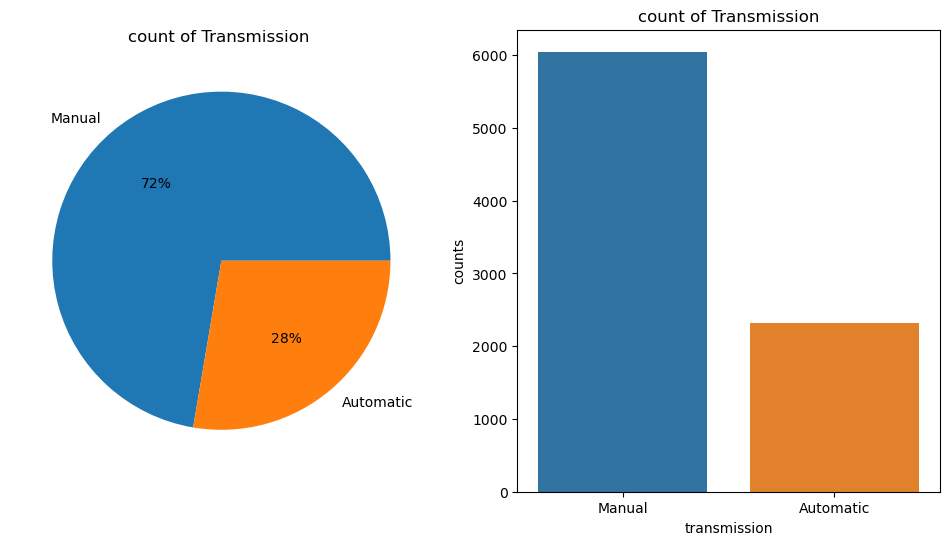

In [179]:
# visual the count of transmission
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("count of Transmission ")
plt.pie(df["transmission"].value_counts(),autopct="%1.0f%%",labels=['Manual','Automatic'])
plt.subplot(1,2,2)
sns.countplot(x=df["transmission"],data=df,hue="transmission")
plt.xlabel("transmission")
plt.ylabel("counts")
plt.title("count of Transmission")
plt.show()

In [181]:
df["Brand"].value_counts()

Brand
Maruti                2248
Hyundai               1651
Honda                  864
Tata                   430
Mahindra               376
Toyota                 325
Renault                311
Ford                   311
Volkswagen             294
Mercedes-Benz          244
BMW                    184
Skoda                  160
Kia                    158
Audi                   156
Jeep                   112
MG                      90
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  35
Fiat                    31
Mitsubishi              14
Mini                    12
Citroen                  8
Porsche                  6
Lexus                    5
Mahindra Renault         5
Isuzu                    5
Mahindra Ssangyong       4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64

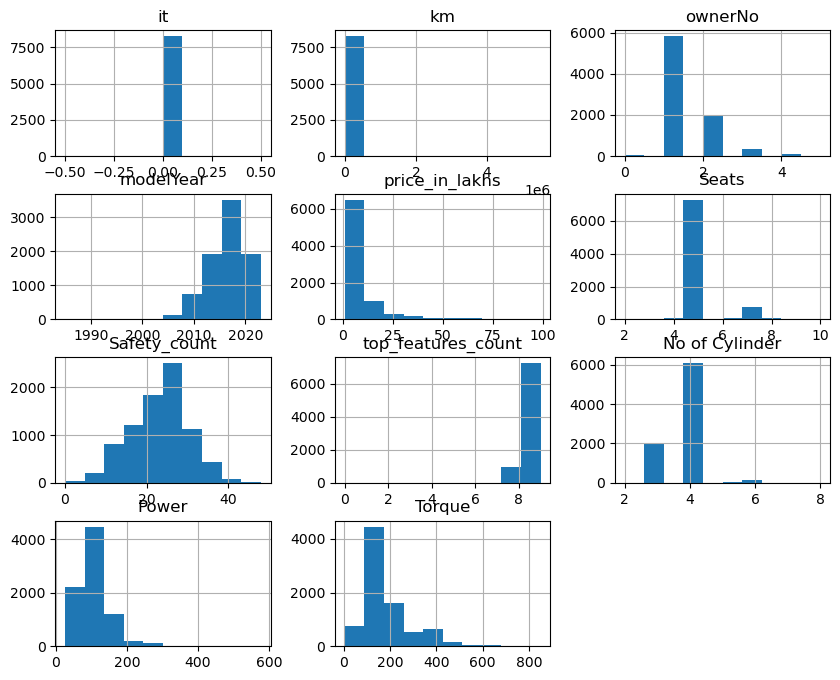

In [599]:
# histogram to visual the data distribution
data.hist(figsize=(10,8))
plt.show()

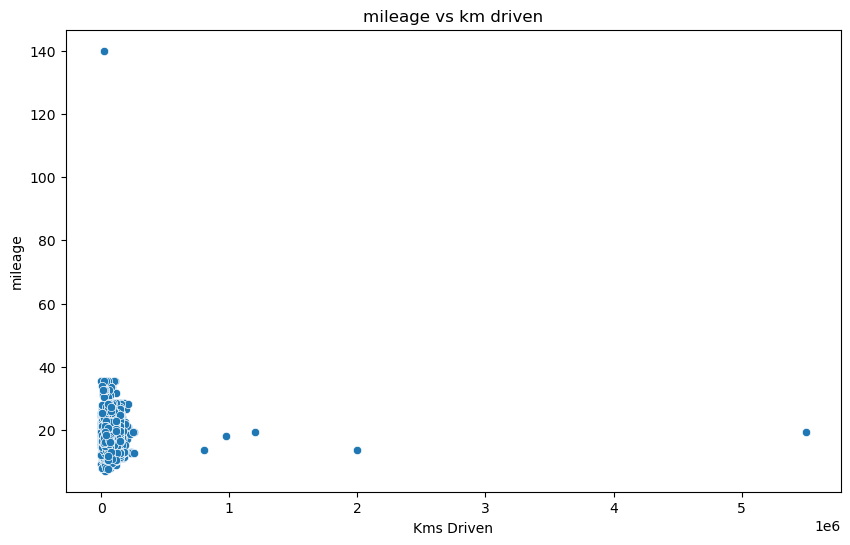

In [185]:
# scatterplot to visual the data distribution
plt.figure(figsize=(10, 6))
plt.title("mileage vs km driven")
sns.scatterplot(y='Mileage', x='Kms Driven', data=df)
plt.xlabel("Kms Driven")
plt.ylabel("mileage")
plt.show()

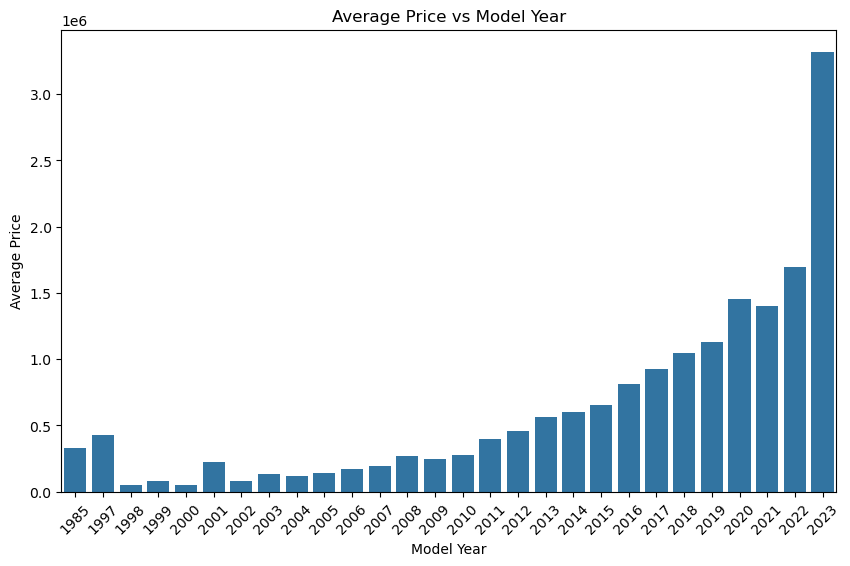

In [187]:
# Calculate the average price for each model year
avg_price_by_year = df.groupby('modelYear')['price'].mean().reset_index()

# Create a bar plot to visualize the average price by model year
plt.figure(figsize=(10, 6))
plt.title("Average Price vs Model Year")
sns.barplot(x='modelYear', y='price', data=avg_price_by_year)
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='modelYear', ylabel='price'>

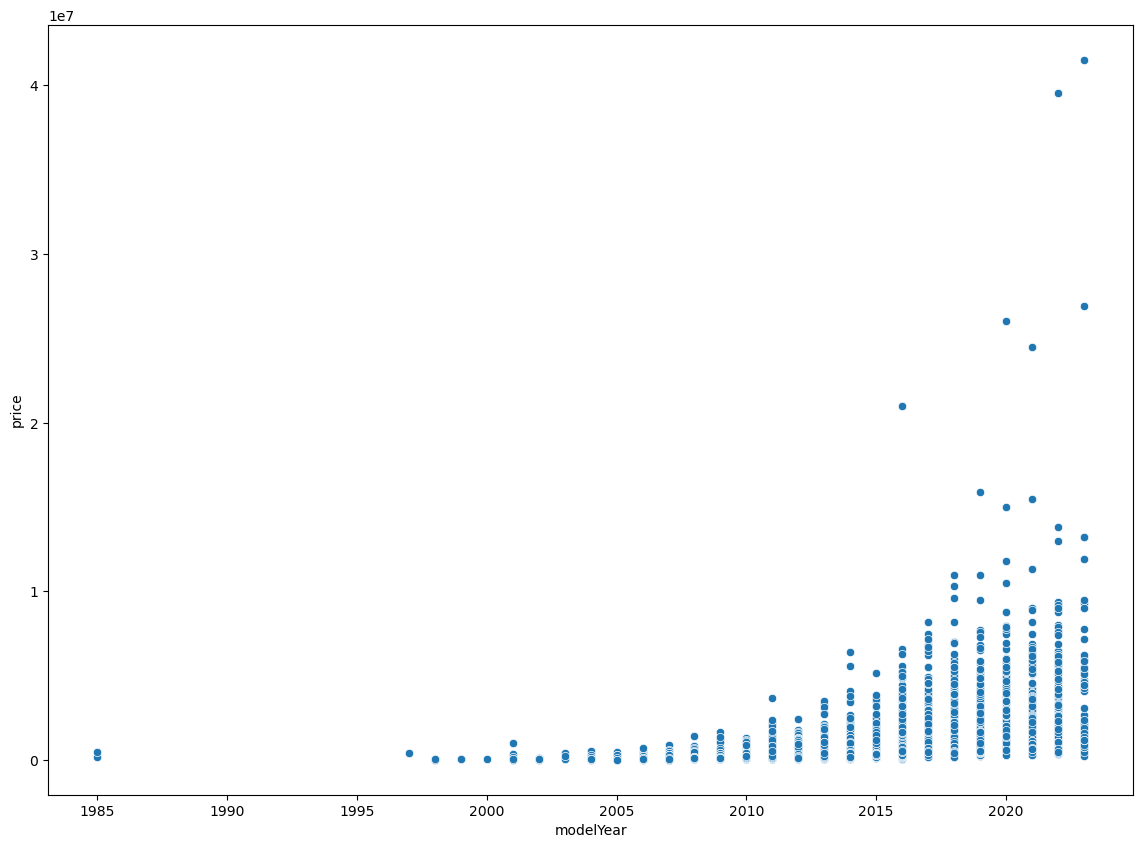

In [189]:
# modelYear and price
plt.figure(figsize=(14, 10))
sns.scatterplot(x='modelYear', y='price', data=df)

In [191]:
max_price_index = df["price"].idxmax()
max_price_row = df.loc[max_price_index]
print(max_price_row)


Fuel type                         Petrol
body type                            SUV
transmission                   Automatic
ownerNo                                1
Brand                      Mercedes-Benz
model             Mercedes-Benz AMG G 63
modelYear                           2023
price                         41500000.0
Insurance Type             Comprehensive
Kms Driven                          3500
Mileage                        19.245568
Engine                              3982
Seats                                  5
Color                              White
City                               Delhi
Name: 3383, dtype: object


In [208]:
df_corr.head()

,ownerNo,modelYear,Kms Driven,Seats
0,3,2015,120000,5
1,2,2018,32706,5
2,1,2018,11949,5
3,1,2014,17794,5
4,1,2015,60000,5


<Axes: >

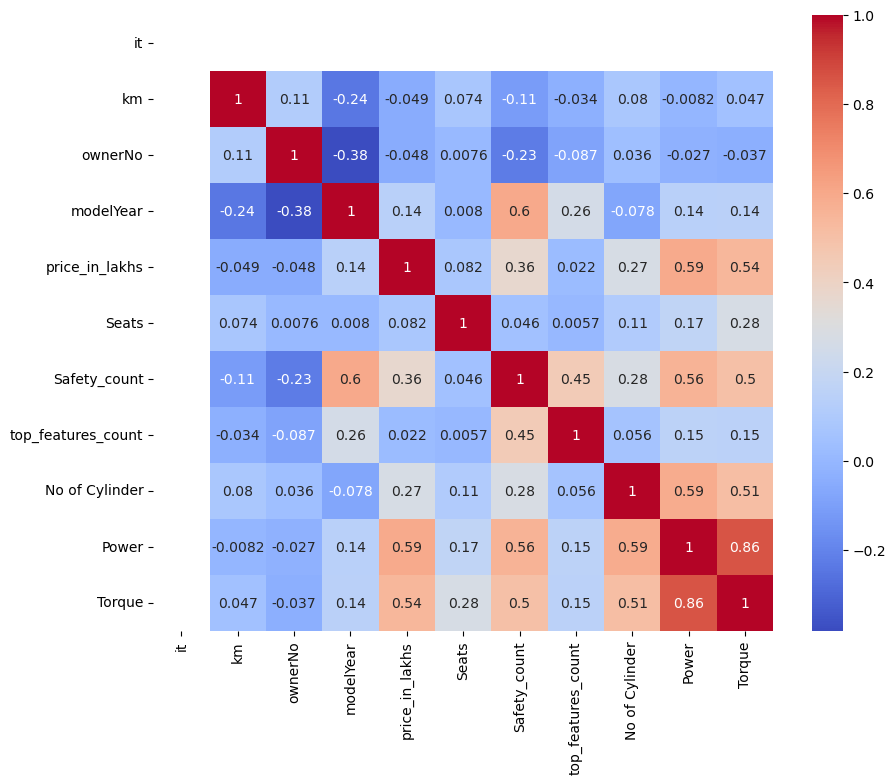

In [603]:
#correlation
# get numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# calc correlation and display heatmap for multicollinearity check
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [395]:
#removing columns based on multi_colinearity

In [605]:
# drop Torque column from dataframe
data.drop(['it','Torque'], axis=1, inplace=True)